In [0]:
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_orb/py_orb.html

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

3.4.3


In [0]:
!ls

pt1-1.jpg  pt1-2.jpg  sample_data


(3024, 4032, 3)


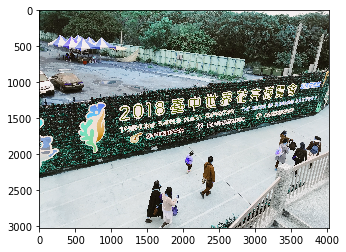

In [0]:
img1 = cv2.imread('pt1-1.jpg',-1)
img2 = cv2.imread('pt1-2.jpg',-1)

#img_dis = img[:,:,:-1]
plt.imshow(img1)
print(img1.shape)

(456, 898, 3)


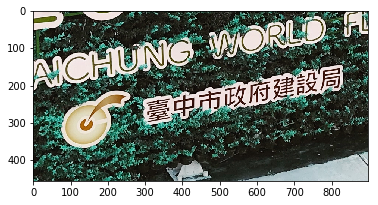

In [0]:
plt.imshow(img2)
print(img2.shape)

In [0]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [0]:
# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img1_gray,None)

print(type(kp))
print(type(kp[0]))

<class 'list'>
<class 'cv2.KeyPoint'>


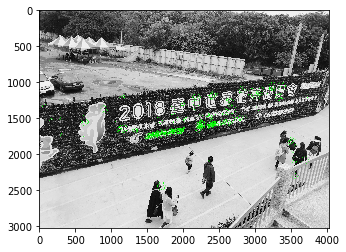

(<matplotlib.image.AxesImage at 0x7f770eee5be0>, None)

In [0]:
# compute the descriptors with ORB
kp, des = orb.compute(img1_gray, kp)

# draw only keypoints location,not size and orientation
img2_display = cv2.drawKeypoints(img1_gray,kp,color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, outImage = img1_gray)
plt.imshow(img2_display),plt.show()

In [0]:
kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)

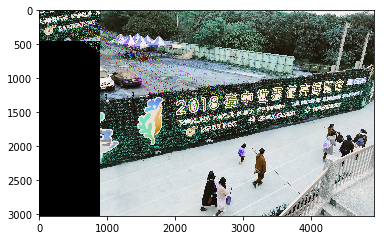

(<matplotlib.image.AxesImage at 0x7f770f0030b8>, None)

In [0]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv2.drawMatches(img2, kp2, img1, kp1, matches[:80], img2, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

plt.imshow(img3), plt.show()

In [0]:
cv2.imwrite('output.jpg', img3)

True